# Import CSV

## Method 1:
### Using UnicodeCSV Package

In [1]:
import unicodecsv
enrollments = []
f = open('enrollments.csv','rb')
reader = unicodecsv.DictReader(f)

for row in reader:
    enrollments.append(row)
    
f.close()

enrollments[0]

{'account_key': '448',
 'cancel_date': '2015-01-14',
 'days_to_cancel': '65',
 'is_canceled': 'True',
 'is_udacity': 'True',
 'join_date': '2014-11-10',
 'status': 'canceled'}

In [2]:
enrollments_filename = 'enrollments.csv'
with open(enrollments_filename, 'rb') as f:
    reader = unicodecsv.DictReader(f)
    enrollments = list(reader)

In [3]:
enrollments[0]

{'account_key': '448',
 'cancel_date': '2015-01-14',
 'days_to_cancel': '65',
 'is_canceled': 'True',
 'is_udacity': 'True',
 'join_date': '2014-11-10',
 'status': 'canceled'}

In [4]:
engagement_filename = 'daily_engagement.csv'
submissions_filename = 'project_submissions.csv'

with open(engagement_filename, 'rb') as f:
    reader = unicodecsv.DictReader(f)
    daily_engagement = list(reader)
    
with open(submissions_filename, 'rb') as f:
    reader = unicodecsv.DictReader(f)
    project_submissions = list(reader)

In [5]:
daily_engagement[0]

{'acct': '0',
 'lessons_completed': '0.0',
 'num_courses_visited': '1.0',
 'projects_completed': '0.0',
 'total_minutes_visited': '11.6793745',
 'utc_date': '2015-01-09'}

In [6]:
project_submissions[0]

{'account_key': '256',
 'assigned_rating': 'UNGRADED',
 'completion_date': '2015-01-16',
 'creation_date': '2015-01-14',
 'lesson_key': '3176718735',
 'processing_state': 'EVALUATED'}

Since we are doing the same thing everytime, it's better to create a function instead

In [7]:
def read_csv(filename):
    with open(filename, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)

Thus, it goes like...

In [8]:
enrollments = read_csv(enrollments_filename)

In [9]:
daily_engagement = read_csv(engagement_filename)

In [10]:
project_submissions = read_csv(submissions_filename)

# Fixing Datatypes

In [11]:
from datetime import datetime as dt

# Takes a date as a string, and returns a Python datetime object. 
# If there is no date given, returns None
def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')
    
# Takes a string which is either an empty string or represents an integer,
# and returns an int or None.
def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

# Clean up the data types in the enrollments table
for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])

In [12]:
enrollments[0]

{'account_key': '448',
 'cancel_date': datetime.datetime(2015, 1, 14, 0, 0),
 'days_to_cancel': 65,
 'is_canceled': True,
 'is_udacity': True,
 'join_date': datetime.datetime(2014, 11, 10, 0, 0),
 'status': 'canceled'}

In [13]:
# Clean up the data types in the engagement table
for engagement_record in daily_engagement:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
    
daily_engagement[0]

# Clean up the data types in the submissions table
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])

project_submissions[0]

{'account_key': '256',
 'assigned_rating': 'UNGRADED',
 'completion_date': datetime.datetime(2015, 1, 16, 0, 0),
 'creation_date': datetime.datetime(2015, 1, 14, 0, 0),
 'lesson_key': '3176718735',
 'processing_state': 'EVALUATED'}

**NOTE: Data Analysis Phase**
    1. Question Phase
    2. Wrangling Phase
        - Data Acquisition
        - Data Cleaning
    3. Exploring Phase
        - Build Intuition
        - Find Patterns
    4. Drawing Conclusion / Prediction Phase
    5. Communicating Phase

# Question Phase

    1. How long would it take students to complete project?
    2. What are the characteristics of a student who has completed the project and who hasn't?
    3. On an average, how many students enrolled but cancel their nanodegree per month?
    4. How many people are interested in nanodegree but didn't enroll?

# Wrangling Phase

##Data Investigation

###Number of Rows and unique number of rows in each table

In [14]:
def check_number(tablename):
    return len(tablename)
    
def check_unique(tablename, unique_field):
    unique_tablename = set()
    for tab in tablename:
        unique_tablename.add(tab[unique_field])
    return unique_tablename

enrollment_unique = check_unique(enrollments,"account_key")
enrollment_num_rows = check_number(enrollments)
enrollment_num_unique_students = check_number(enrollment_unique)

engagement_unique = check_unique(daily_engagement,"acct")
engagement_num_rows = check_number(daily_engagement)
engagement_num_unique_students = check_number(engagement_unique)

submission_unique = check_unique(project_submissions,"account_key")
submission_num_rows = check_number(project_submissions)
submission_num_unique_students = check_number(submission_unique)


# Printing all
print(enrollment_num_rows)
print(enrollment_num_unique_students)

print(engagement_num_rows)
print(engagement_num_unique_students)

print(submission_num_rows)
print(submission_num_unique_students)

1640
1302
136240
1237
3642
743


###Problem with Data

As seen in the table there is 'account_key' in two table and 'acct' in the third. Fixing That ...

In [15]:
for tab in daily_engagement:
    tab['account_key'] = tab['acct']
    del tab['acct']

In [16]:
daily_engagement[0]['account_key']

'0'

Why are students missing from daily_engagement?

Steps to be followed to solve:
    1. Identify suprising data points, if any
        - Any enrollment record with no corresponding engagement data
    2. Print out one or a few surprising data points
    3. Fix any problems you find
        - More investigation you find
        - Or there isn't any problem at all
    
###Missing Engagement Record

In [17]:
missing = set()
for enroll in enrollment_unique:
    if enroll not in engagement_unique:
        missing.add(enroll)
len(missing)

65

Thus, there are 65 unique surprising data points

Finding First Surprising data point

In [18]:
for enrollment in enrollments:
    student  = enrollment['account_key']
    if student not in engagement_unique:
        print(enrollment)
        break

{'account_key': '1219', 'cancel_date': datetime.datetime(2014, 11, 12, 0, 0), 'join_date': datetime.datetime(2014, 11, 12, 0, 0), 'days_to_cancel': 0, 'is_canceled': True, 'status': 'canceled', 'is_udacity': False}


###Checking for More Problem Records

If there is any record of enrollment table not present in engagement table but the person is active for at least a day

In [19]:
number_of_students = 0
for enrollment in enrollments:
    student  = enrollment['account_key']
    if student not in engagement_unique and (enrollment['days_to_cancel'] != 0 or enrollment['days_to_cancel'] == None) :
        number_of_students += 1
number_of_students

3

Thus, there are 3 problem record still in the data

###Tracking Down Remaining Problems
The above 3 records has is_udacity column value as True, thus, they are test account. So there isn't any problem, hence we should exclude them.

In [20]:
udacity_test_accounts = set()
for enrollment in enrollments:
    if enrollment['is_udacity']:
        udacity_test_accounts.add(enrollment['account_key'])
len(udacity_test_accounts)

6

To remove these records (we don't need them for future analysis), we will define a function as:

In [21]:
def remove_udacity_accounts(data):
    non_udacity_data = []
    for data_point in data:
        if data_point ['account_key'] not in udacity_test_accounts:
            non_udacity_data.append(data_point)
    return non_udacity_data

In [22]:
non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagement = remove_udacity_accounts(daily_engagement)
non_udacity_submissions = remove_udacity_accounts(project_submissions)

print(len(non_udacity_enrollments))
print(len(non_udacity_engagement))
print(len(non_udacity_submissions))

1622
135656
3634


#Explore Phase

Question: How do numbers in the daily engagement table differ for students who pass the fisrt project?

Problems in solving this:
    1. The table will include data from after the project submission
    2. The table compares data from different lengths of time
    3. It includes engagement in courses not related to the first project
    
Revision: Only look at the engagement from first week, and exclude students who cancel within a week

Steps To Be Taken:
    1. Creating dictionary for:
        - students who haven't canceled yet (days_to_cancel == None)
        - students who stayed enrolled for more than 7 days (days_to_cancel > 7)

In [23]:
paid_students = {}
for enroll in non_udacity_enrollments:
    if not enroll['is_canceled'] or enroll['days_to_cancel'] > 7:
        account_key = enroll['account_key']
        enrollment_date = enroll['join_date']
        if account_key not in paid_students or enrollment_date > paid_students[account_key]:
            paid_students[account_key] = enrollment_date
len(paid_students)

995

Creating a list of rows from the engagement table including only rows where the students is one of the paid students you just found, and the date is within one week of the student's join date

In [24]:
def within_one_week(join_date,engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7

In [25]:
def remove_free_trial_cancels(data):
    new_data = []
    for data_point in data:
        if data_point['account_key'] in paid_students:
            new_data.append(data_point)
    return new_data

In [26]:
paid_enrollments = remove_free_trial_cancels(non_udacity_enrollments)
paid_engagement = remove_free_trial_cancels(non_udacity_engagement)
paid_submissions = remove_free_trial_cancels(non_udacity_submissions)

print(len(paid_enrollments))
print(len(paid_engagement))
print(len(paid_submissions))

1293
134549
3618


In [27]:
paid_engagement_in_first_week = []
for engagement_record in paid_engagement:
    account_key = engagement_record['account_key']
    join_date = paid_students[account_key]
    engagement_record_date = engagement_record['utc_date']

    if within_one_week(join_date, engagement_record_date):
         paid_engagement_in_first_week.append(engagement_record)

len(paid_engagement_in_first_week)

21508

###Exploring Student Engagement
Calculating Average Time Spent by an individual

In [28]:
from collections import defaultdict

engagement_by_account = defaultdict(list)
for engagement_record in paid_engagement_in_first_week:
    account_key = engagement_record['account_key']
    engagement_by_account[account_key].append(engagement_record)

In [29]:
total_minutes_by_account = {}

for account_key, engagement_for_student in engagement_by_account.items():
    total_minutes = 0
    for engagement_record in engagement_for_student:
        total_minutes += engagement_record['total_minutes_visited']
    total_minutes_by_account[account_key] = total_minutes

In [30]:
total_minutes = list(total_minutes_by_account.values())

import numpy as np

print("Mean:",np.mean(total_minutes))
print("Standard Deviation:",np.std(total_minutes))
print("Minimum:",np.min(total_minutes))
print("Maximum:",np.max(total_minutes))

Mean: 647.590173826
Standard Deviation: 1129.27121042
Minimum: 0.0
Maximum: 10568.1008673


Total number of minutes in 1 week = 10080 minutes. But here max = 10568.1008673. Thus, there is some problem.
###Debugging Data Problem

Steps to do that:
    1. Identify surprising data points
    2. Print out one or few surprising points
    3. Fix any problem you find

The bug is actually in the initial code. Let's find it out.

We need to find the student whose result is giving maximum time as 10568.

In [31]:
students_with_max_minutes = None
max_minutes = 0

for students, total_minutes in total_minutes_by_account.items():
    if total_minutes > max_minutes:
        max_minutes = total_minutes
        students_with_max_minutes = students
        
max_minutes

10568.100867332541

It's same as the maximum time. Thus, print out the records associated with this total time.

In [32]:
for engagement_record in paid_engagement_in_first_week:
    if engagement_record['account_key'] == students_with_max_minutes:
        print(engagement_record)

{'account_key': '108', 'total_minutes_visited': 50.9938951667, 'num_courses_visited': 1, 'utc_date': datetime.datetime(2015, 1, 7, 0, 0), 'lessons_completed': 0, 'projects_completed': 0}
{'account_key': '108', 'total_minutes_visited': 688.3034385, 'num_courses_visited': 2, 'utc_date': datetime.datetime(2015, 1, 8, 0, 0), 'lessons_completed': 5, 'projects_completed': 0}
{'account_key': '108', 'total_minutes_visited': 427.691757667, 'num_courses_visited': 2, 'utc_date': datetime.datetime(2015, 1, 9, 0, 0), 'lessons_completed': 1, 'projects_completed': 0}
{'account_key': '108', 'total_minutes_visited': 165.6270925, 'num_courses_visited': 3, 'utc_date': datetime.datetime(2015, 1, 10, 0, 0), 'lessons_completed': 0, 'projects_completed': 0}
{'account_key': '108', 'total_minutes_visited': 0.0, 'num_courses_visited': 0, 'utc_date': datetime.datetime(2015, 1, 11, 0, 0), 'lessons_completed': 0, 'projects_completed': 0}
{'account_key': '108', 'total_minutes_visited': 199.746703834, 'num_courses_v

There must be 0-7 records for each account key as it consist of data for 1 week (7 days). Also, the utc_date consists of data from '7 Jan 2015' to '26 Apr 2015'. Thus, there is something wrong in within_1week function. Let's review it.

In [33]:
def within_one_week(join_date,engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7

Since, students can cancel and then again register themselves, thus, the join that can be after the engagement_date and that creates a probelm. To solve it:

In [34]:
def within_one_week(join_date,engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7 and time_delta.days >= 0

Now doing the same thing again as above:

In [35]:
paid_engagement_in_first_week = []
for engagement_record in paid_engagement:
    account_key = engagement_record['account_key']
    join_date = paid_students[account_key]
    engagement_record_date = engagement_record['utc_date']

    if within_one_week(join_date, engagement_record_date):
         paid_engagement_in_first_week.append(engagement_record)

len(paid_engagement_in_first_week)

6919

In [36]:
engagement_by_account = defaultdict(list)
for engagement_record in paid_engagement_in_first_week:
    account_key = engagement_record['account_key']
    engagement_by_account[account_key].append(engagement_record)

In [37]:
total_minutes_by_account = {}

for account_key, engagement_for_student in engagement_by_account.items():
    total_minutes = 0
    for engagement_record in engagement_for_student:
        total_minutes += engagement_record['total_minutes_visited']
    total_minutes_by_account[account_key] = total_minutes

In [38]:
total_minutes = list(total_minutes_by_account.values())

import numpy as np

print("Mean:",np.mean(total_minutes))
print("Standard Deviation:",np.std(total_minutes))
print("Minimum:",np.min(total_minutes))
print("Maximum:",np.max(total_minutes))

Mean: 306.708326753
Standard Deviation: 412.996933409
Minimum: 0.0
Maximum: 3564.7332645


In [39]:
students_with_max_minutes = None
max_minutes = 0

for students, total_minutes in total_minutes_by_account.items():
    if total_minutes > max_minutes:
        max_minutes = total_minutes
        students_with_max_minutes = students
        
max_minutes

3564.7332644989997

In [40]:
for engagement_record in paid_engagement_in_first_week:
    if engagement_record['account_key'] == students_with_max_minutes:
        print(engagement_record)

{'account_key': '163', 'total_minutes_visited': 850.519339666, 'num_courses_visited': 4, 'utc_date': datetime.datetime(2015, 7, 9, 0, 0), 'lessons_completed': 4, 'projects_completed': 0}
{'account_key': '163', 'total_minutes_visited': 872.633923334, 'num_courses_visited': 6, 'utc_date': datetime.datetime(2015, 7, 10, 0, 0), 'lessons_completed': 6, 'projects_completed': 0}
{'account_key': '163', 'total_minutes_visited': 777.018903666, 'num_courses_visited': 2, 'utc_date': datetime.datetime(2015, 7, 11, 0, 0), 'lessons_completed': 6, 'projects_completed': 0}
{'account_key': '163', 'total_minutes_visited': 294.568774, 'num_courses_visited': 1, 'utc_date': datetime.datetime(2015, 7, 12, 0, 0), 'lessons_completed': 2, 'projects_completed': 0}
{'account_key': '163', 'total_minutes_visited': 471.2139785, 'num_courses_visited': 3, 'utc_date': datetime.datetime(2015, 7, 13, 0, 0), 'lessons_completed': 1, 'projects_completed': 0}
{'account_key': '163', 'total_minutes_visited': 298.778345333, 'nu

Now, both, maximum time and number of records are reasonable.
###Lessons Completed in first week
Calculating number of lessons completed in first week

In [41]:
def group_data(data, key_name):
    grouped_data = defaultdict(list)
    for data_point in data:
        account_key = data_point[key_name]
        grouped_data[account_key].append(data_point)
    return grouped_data

In [42]:
engagement_by_account = group_data(paid_engagement_in_first_week,'account_key')

In [43]:
def sum_grouped_data(grouped_data,field_name):
    summed_data = {}

    for key, data_points in grouped_data.items():
        total = 0
        for data_point in data_points:
            total += data_point[field_name]
        summed_data[key] = total
    return summed_data

In [44]:
lessons_completed_by_account = sum_grouped_data(engagement_by_account,'lessons_completed')

In [45]:
def describe_data(data):
    print("Mean:",np.mean(data))
    print("Standard Deviation:",np.std(data))
    print("Minimum:",np.min(data))
    print("Maximum:",np.max(data)) 

In [46]:
total_projects = list(lessons_completed_by_account.values())
describe_data(total_projects)

Mean: 1.63618090452
Standard Deviation: 3.00256129983
Minimum: 0
Maximum: 36


###Analyzing num_courses_visited

Analyze the number of days  the student visited classroom

Two Ways to do this:
    1. Change the sum_group_items function
    2. Create a field has_visited - either as 0 or 1

In [47]:
for engagement_record in paid_engagement:
    if engagement_record['num_courses_visited'] > 0:
        engagement_record['has_visited'] = 1
    else:
        engagement_record['has_visited'] = 0

In [48]:
engagement_by_account = group_data(paid_engagement_in_first_week,'account_key')

In [49]:
lessons_completed_by_account = sum_grouped_data(engagement_by_account,'lessons_completed')

In [50]:
total_projects = list(lessons_completed_by_account.values())
describe_data(total_projects)

Mean: 1.63618090452
Standard Deviation: 3.00256129983
Minimum: 0
Maximum: 36


In [51]:
days_visited_by_account = sum_grouped_data(engagement_by_account,'has_visited')

In [52]:
total_days = list(days_visited_by_account.values())
describe_data(total_days)

Mean: 2.86733668342
Standard Deviation: 2.25519800292
Minimum: 0
Maximum: 7


###Splitting out passing students
Creating two lists of engagement data for paid students in first week.

The first list should contain data for students who eventually pass the subway project, and the second list should contain data for students who do not.

In [53]:
subway_project_lesson_keys = ['746169184', '3176718735']

subway_project_pass = set()

for submission in paid_submissions:
    if submission['lesson_key'] in subway_project_lesson_keys and \
    (submission['assigned_rating'] == "PASSED" or submission['assigned_rating'] == "DISTINCTION"):
        subway_project_pass.add(submission['account_key'])

print(len(subway_project_pass))        

647


In [54]:
passing_engagement = []
non_passing_engagement = []

for engagement_record in paid_engagement_in_first_week:
    if engagement_record['account_key'] in subway_project_pass:
        passing_engagement.append(engagement_record)
    else:
        non_passing_engagement.append(engagement_record)

print(len(passing_engagement))
print(len(non_passing_engagement))

4527
2392


###Comparing the two student groups
Calculate some metrics for both groups:

For Example,
    - The three we looked earlier --- minutes spent, lessons completed and days visited
    
    - Are these students more likely to complete other projects
    
    - Look at the more granular data in daily_engagement_full.csv
    
    - Be creative!
Which metric has the most interesting difference?

**Minutes Spent**

In [55]:
passing_engagement_by_account = group_data(passing_engagement,'account_key')
non_passing_engagement_by_account = group_data(non_passing_engagement,'account_key')

In [56]:
passing_minutes = sum_grouped_data(passing_engagement_by_account,'total_minutes_visited')
non_passing_minutes = sum_grouped_data(non_passing_engagement_by_account,'total_minutes_visited')

In [57]:
total_minutes_passing = list(passing_minutes.values())
total_minutes_non_passing = list(non_passing_minutes.values())

print("Passing Students:")
describe_data(total_minutes_passing)
print("Non-Passing Students:")
describe_data(total_minutes_non_passing)

Passing Students:
Mean: 394.586046484
Standard Deviation: 448.499519327
Minimum: 0.0
Maximum: 3564.7332645
Non-Passing Students:
Mean: 143.326474267
Standard Deviation: 269.538619011
Minimum: 0.0
Maximum: 1768.52274933


**Lessons Completed **

In [58]:
passing_lessons = sum_grouped_data(passing_engagement_by_account,'lessons_completed')
non_passing_lessons = sum_grouped_data(non_passing_engagement_by_account,'lessons_completed')

total_lessons_passing = list(passing_lessons.values())
total_lessons_non_passing = list(non_passing_lessons.values())

print("Passing Students:")
describe_data(total_lessons_passing)
print("Non-Passing Students:")
describe_data(total_lessons_non_passing)

Passing Students:
Mean: 2.05255023184
Standard Deviation: 3.14222705558
Minimum: 0
Maximum: 36
Non-Passing Students:
Mean: 0.862068965517
Standard Deviation: 2.54915994183
Minimum: 0
Maximum: 27


**Days Visited**

In [59]:
passing_visited = sum_grouped_data(passing_engagement_by_account,'has_visited')
non_passing_visited = sum_grouped_data(non_passing_engagement_by_account,'has_visited')

total_days_visited_passing = list(passing_visited.values())
total_days_visited_non_passing = list(non_passing_visited.values())

print("Passing Students:")
describe_data(total_days_visited_passing)
print("Non-Passing Students:")
describe_data(total_days_visited_non_passing)

Passing Students:
Mean: 3.38485316847
Standard Deviation: 2.25882147092
Minimum: 0
Maximum: 7
Non-Passing Students:
Mean: 1.90517241379
Standard Deviation: 1.90573144136
Minimum: 0
Maximum: 7


###Making Histogram

In [66]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

def describe_data(data):
    print("Mean:",np.mean(data))
    print("Standard Deviation:",np.std(data))
    print("Minimum:",np.min(data))
    print("Maximum:",np.max(data)) 
    plt.hist(data)

Mean: 394.586046484
Standard Deviation: 448.499519327
Minimum: 0.0
Maximum: 3564.7332645
Mean: 143.326474267
Standard Deviation: 269.538619011
Minimum: 0.0
Maximum: 1768.52274933


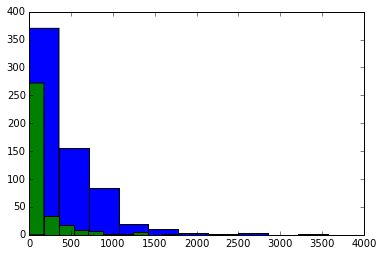

In [67]:
describe_data(total_minutes_passing)
describe_data(total_minutes_non_passing)

Mean: 2.05255023184
Standard Deviation: 3.14222705558
Minimum: 0
Maximum: 36
Mean: 0.862068965517
Standard Deviation: 2.54915994183
Minimum: 0
Maximum: 27


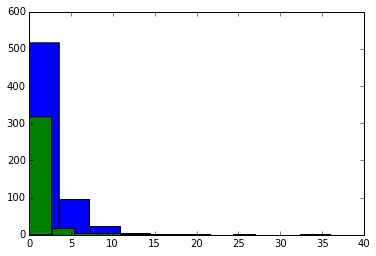

In [68]:
describe_data(total_lessons_passing)
describe_data(total_lessons_non_passing)

Mean: 3.38485316847
Standard Deviation: 2.25882147092
Minimum: 0
Maximum: 7
Mean: 1.90517241379
Standard Deviation: 1.90573144136
Minimum: 0
Maximum: 7


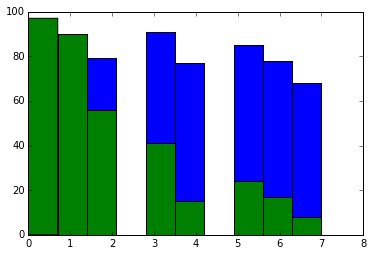

In [69]:
describe_data(total_days_visited_passing)
describe_data(total_days_visited_non_passing)

#Drawing Conclusion Phase
###Does result contains just noise?
Tentative Conclusion: Students who pass the subway project spend more minutes in classroom during their first week.

But is this a true difference, or due to noise in data?

You can check this using statistics.

###Conclusion doesn't imply causation

Students who pass the first project are more likely to visit the classroom multiple times in their first week.

This is a correlation between 'passing first project' and 'visiting classroom'. But does visiting the classroom multiple times *cause* students to pass their project?

Third Factors that could cause visiting the classroom and passing projects:
    - Level of Interest
    - Background Knowledge
Or this correlation *could* be because of causation! We just don't know.

To find out, run an A/B Test.
###Make Prediction:
Which students are likely to pass their first project?

Could take a first pass using heuristics, but getting a really good prediction this way could be difficult.
    - Lots of different pieces of information to look at
    - These features can interact
*Machine Learning can make predictions automatically*
#Communication Phase
What findings are most interesting?
    - Difference in total minutes
    - Difference in days visited

How will you present them?
    - Report average minutes
    - Show Histogram

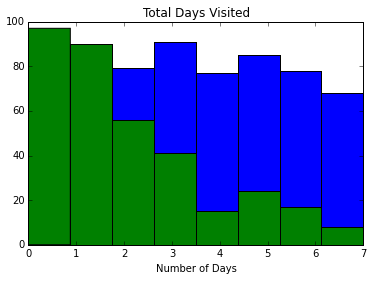

In [70]:
plt.hist(total_days_visited_passing,bins=8)
plt.hist(total_days_visited_non_passing,bins=8)
plt.title("Total Days Visited")
plt.xlabel("Number of Days")